In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv('appliance_energy.csv')
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


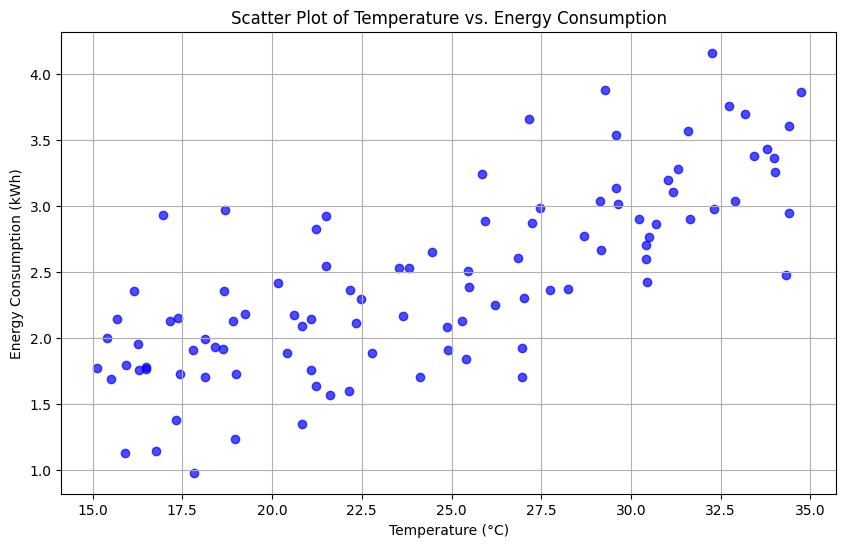

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))  # Set the figure size for better visualization
plt.scatter(df['Temperature (°C)'], df['Energy Consumption (kWh)'], color='blue', alpha=0.7)

# Add labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Scatter Plot of Temperature vs. Energy Consumption')

# Add a grid for better readability
plt.grid(True)

# Show the plot
plt.show()

In [4]:
print(df.isnull().sum())

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [8]:
df.describe()

,Temperature (°C),Energy Consumption (kWh)
count,100.000000,100.000000
mean,24.403615,2.439821
std,5.949788,0.693527
min,15.110442,0.978107
25%,18.864015,1.908640
50%,24.282849,2.364121
75%,29.604062,2.931199
max,34.737739,4.159094


In [9]:
#independent and dependent values
X= df[['Temperature (°C)']]
y= df['Energy Consumption (kWh)']

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [11]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
print("Slope: ",model.coef_)
print("y-Intercept: ",model.intercept_)

Slope:  [0.08996618]
y-Intercept:  0.22196391661907633


In [15]:
print(model.coef_ + model.intercept_)

[0.3119301]


In [17]:
y_pred = model.predict(X_test)
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [18]:
mse=mean_squared_error(y_test,y_pred)
mse

0.16342487842925055

In [19]:
r2=r2_score(y_test,y_pred)
r2

0.6119478445218713

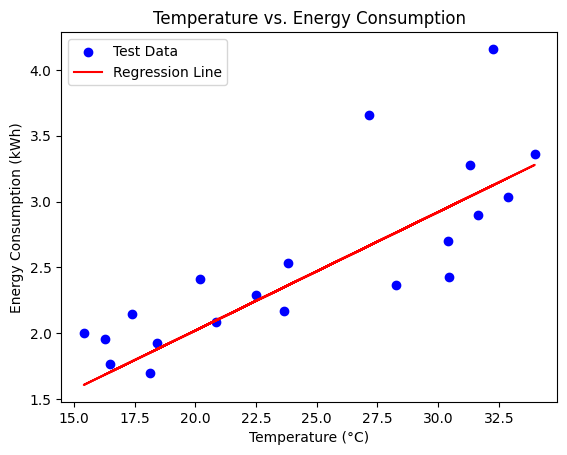

In [20]:
plt.scatter(X_test,y_test,color='blue',label='Test Data')
plt.plot(X_test,y_pred,color='red',label='Regression Line')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Temperature vs. Energy Consumption')
plt.legend()
plt.show()

In [25]:
#save the file
import joblib
joblib.dump(model,'energy_consumption_model.pkl')

['energy_consumption_model.pkl']

In [28]:
#implimentation of the model

import joblib
import pandas as pd
import numpy as np

# Load the saved model
loaded_model = joblib.load('energy_consumption_model.pkl')

# Prepare new data for prediction
# For example, let's say you want to predict energy consumption for the following temperatures
new_temperatures = pd.DataFrame({'Temperature (°C)': [25.5, 27.0, 30.2]})  # Replace with your actual new data.

# Make predictions using the loaded model
predictions = loaded_model.predict(new_temperatures)

# Display the predictions
print("Predictions for new temperatures:")
print(predictions)

Predictions for new temperatures:
[2.51610158 2.65105085 2.93894264]


In [ ]:
@#